In [413]:
import pandas as pd 
import numpy as np

In [414]:
df = pd.read_csv("cars-dataset.csv")

In [415]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [416]:
df.cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [418]:
df.shape

(398, 8)

In [419]:
df.describe().transpose() #hp column is not shown here.. means some problem with hp columns. 

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [420]:
df.isnull().all().all()

False

In [421]:
df.isna().all().all()

False

#### Dropping all non numeric values 

In [422]:
temp = pd.DataFrame(df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [423]:
coluumns = df.columns.values
for i in range(1,len(coluumns)):
    try:
        df[coluumns[i]] = pd.to_numeric(df[coluumns[i]])
    except:
        print("problem is with " + coluumns[i] + " column")


problem is with hp column


In [424]:
df['hp'] = pd.to_numeric(df.hp,errors='coerce')
sum(df.hp.isnull())  #6 values which were non numeric. 

6

In [425]:
df = df.dropna()
df.shape

(392, 8)

In [426]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [427]:
import seaborn as sns

In [428]:
#sns.pairplot(df, diag_kind='kde', hue = 'cyl')
# by looking at the pairplot there could be naturally 3 clusters. 

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [430]:
df.drop(['car name', 'yr'], axis= 1, inplace=True)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null float64
wt      392 non-null int64
acc     392 non-null float64
mpg     392 non-null float64
dtypes: float64(4), int64(2)
memory usage: 21.4 KB


In [432]:
from scipy.stats import zscore

df_z = df.apply(zscore)

In [433]:
df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,-1.699321e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
disp,392.0,-2.537653e-16,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
hp,392.0,-4.392745e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
wt,392.0,5.607759e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
acc,392.0,6.117555e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
mpg,392.0,-1.840931e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359


In [434]:
from sklearn.cluster import KMeans

In [435]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters)
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

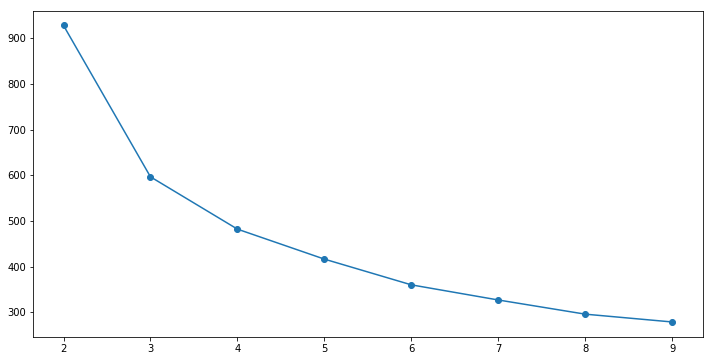

In [436]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [437]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [438]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.47184414,  1.46979213,  1.49145953,  1.37493755, -1.05253303,
        -1.14393843],
       [-0.85505187, -0.75959176, -0.48640496, -0.71771557, -0.18649062,
         0.57678511],
       [ 0.39187234,  0.28655964, -0.08843498,  0.32259113,  0.35679482,
        -0.50412011],
       [-0.82638598, -0.86804417, -0.94034765, -0.86014153,  1.22873873,
         1.00971162]])

In [439]:
prediction=cluster.predict(df_z)
df_z["Group"] = prediction

In [440]:
df_z.head()

,cyl,disp,hp,wt,acc,mpg,Group
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.698638,0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.083498,0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.698638,0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.955212,0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.826925,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207F129F7B8>,
      dtype=object)

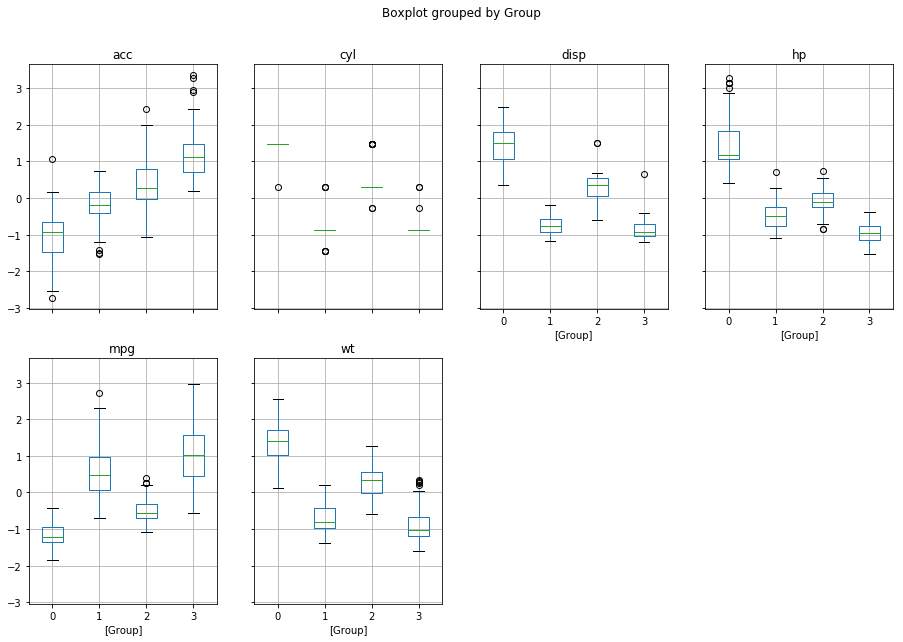

In [441]:
import matplotlib.pylab as plt

df_z.boxplot(by = 'Group',  layout=(2,4), figsize=(15, 10))

In [442]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [443]:
for i in range(4):
    X = df_z[df_z.Group == i].drop(['mpg', 'Group'], axis=1)
    y = df_z[df_z.Group == i][['mpg']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    print("For Cluster " + str(i))
    for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for  {} is {}".format(col_name, regression_model.coef_[0][idx]))
    intercept = regression_model.intercept_[0]
    print("The intercept for our model is {}".format(intercept))
    print("Training score is " + str(regression_model.score(X_train, y_train)))
    print("Testing score is " + str(regression_model.score(X_test, y_test)))

For Cluster 0
The coefficient for  cyl is -0.38757514644138436
The coefficient for  disp is 0.14394569315468972
The coefficient for  hp is -0.25241933289737556
The coefficient for  wt is -0.19499801264908156
The coefficient for  acc is -0.06731737158107935
The intercept for our model is -0.21479861622279883
Training score is 0.4862181303124735
Testing score is 0.08740725376233482
For Cluster 1
The coefficient for  cyl is 0.6277817664773097
The coefficient for  disp is 0.4410878045588974
The coefficient for  hp is -1.0321856199157515
The coefficient for  wt is -0.4074071914070066
The coefficient for  acc is -0.3352107212945187
The intercept for our model is 0.5596938581196397
Training score is 0.48576129820858177
Testing score is 0.4034892056846183
For Cluster 2
The coefficient for  cyl is 0.35116006046995923
The coefficient for  disp is -0.5205190181776508
The coefficient for  hp is 0.13059229503616512
The coefficient for  wt is -0.19694681749215143
The coefficient for  acc is 0.068790